In [34]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [35]:
root = "./schools"

In [36]:
import os
import re
patterns = ["children","enqiures uk", "the", "learning", "staff", "good", "ir", "inspection", "the", "schools", "children", "pupils", "school", "pupil", "Ofsted", "Inspection report", "gov uk", "ofsted gov", "early year", "uk government", "www.ofsted.gov.uk", "www.gov.uk/ofsted", "Early Year", "ofsted", "gov", "Inspection Report"] # filter out common words
closed_school_names = []
closed_reports = []
closed = []
closed_root = root+'/closed/'
for path, subdirs, files in os.walk(closed_root):
    for s in subdirs:
        f = os.path.join(path,s)
        for p2, s2, f2 in os.walk(f):
            for doc in f2:
                txt = open(os.path.join(p2,doc), 'r')
                content = txt.read()
                if re.search('Childminder Report',content):
                    continue
                if re.search('Childminder',content):
                    continue
                content = content.replace('\n',' ')
                for pattern in patterns:
                    content = content.replace(pattern,'')
                if content == '':
                    continue
                closed_reports.append(doc.replace('.txt',''))
                closed_school_names.append(s)
                closed.append(content)

In [37]:
patterns = ["children","enqiures uk", "the", "learning", "staff", "good", "ir", "inspection", "the", "schools", "children", "pupils", "school", "pupil", "Ofsted", "Inspection report", "gov uk", "ofsted gov", "early year", "uk government", "www.ofsted.gov.uk", "www.gov.uk/ofsted", "Early Year", "ofsted", "gov", "Inspection Report"] # filter out common words
opened = []
open_school_names = []
open_reports = []
open_root = root+'/open/'
for path, subdirs, files in os.walk(open_root):
    for s in subdirs:
        f = os.path.join(path,s)
    for p2, s2, f2 in os.walk(f):
        for doc in f2:
            txt = open(os.path.join(p2,doc),'r')
            content = txt.read()
            if re.search('Childminder Report',content):
                continue
            if re.search('Childminder',content):
                continue
            content = content.replace('\n','')
            for pattern in patterns:
                content = content.replace(pattern,' ')
            if content == '':
                continue
            open_reports.append(doc.replace('.txt',''))
            open_school_names.append(s)
            opened.append(content)

In [38]:
import pandas as pd
df_closed = pd.DataFrame()
closed_labels = ["closed" for school in closed]
df_closed["school"] = closed_school_names
df_closed["text"] = closed
df_closed["label"] = closed_labels
df_closed["file"] = closed_reports

In [39]:
df_closed.head()

,school,text,label,file
0,Tweeddale Primary School,Existing a...,closed,2593199
1,Tweeddale Primary School,Scho...,closed,50055540
2,Loganberries Childcare And Tutoring Closed,...,closed,2566925
3,Dovedale Before and After School Club Closed,...,closed,2669737
4,URN: 302140 Closed,for s provision Uni...,closed,1415927


In [40]:
# Filter out schools that were marked as closed due to academy conversion
import numpy as np
df_closed = df_closed.replace(np.nan, '', regex=True)
df_closed = df_closed[~df_closed.text.apply(lambda x: bool(re.search("academy converters",x,re.IGNORECASE)))]

In [41]:
df_open = pd.DataFrame()
open_labels = ["open" for school in opened]
df_open["school"] = open_school_names
df_open["text"] = opened
df_open["label"] = open_labels
df_open["file"] = open_reports

In [42]:
df_open.head()

,school,text,label,file
0,URN: EY557468,Piccadilly GateStore StreetManchesterM1 2WDTe...,open,50052428
1,URN: EY557468,Piccadilly GateStore StreetManchesterM1 2WDTe...,open,50052428
2,URN: EY557468,Piccadilly GateStore StreetManchesterM1 2WDTe...,open,50052428
3,URN: EY557468,Piccadilly GateStore StreetManchesterM1 2WDTe...,open,50052428
4,URN: EY557468,Piccadilly GateStore StreetManchesterM1 2WDTe...,open,50052428


In [43]:
df = df_closed.append(df_open, ignore_index=True)
df.label.unique()

array(['closed', 'open'], dtype=object)

In [44]:
df.head()

,school,text,label,file
0,Tweeddale Primary School,Scho...,closed,50055540
1,Loganberries Childcare And Tutoring Closed,...,closed,2566925
2,Dovedale Before and After School Club Closed,...,closed,2669737
3,URN: 302140 Closed,for s provision Uni...,closed,1415927
4,Pepe & Friends,Pepe & Friends...,closed,50070828


In [45]:
print ("Total number of closed school documents: {}".format(len(closed)))
print ("Total number of open school documents: {}".format(len(opened)))

Total number of closed school documents: 107758
Total number of open school documents: 280864


In [46]:
print ("Closed schools after filtering for academy converters: {}".format(len(df_closed))) # 530 after filtering out academy converter
print ("Open schools: {}".format(len(df_open)))

Closed schools after filtering for academy converters: 105451
Open schools: 280864


In [47]:
# Add dates from other CSVs
closed_dates_df = pd.read_csv('closed_school_dates.csv')
open_dates_df = pd.read_csv('open_school_dates.csv')

In [48]:
closed_dates_df.head()

,school,report,date
0,Chesterton Primary School Closed,2074707,11 September 2012
1,Chesterton Primary School Closed,964165,28 September 2012
2,Chesterton Primary School Closed,902265,29 September 2009
3,Chesterton Primary School Closed,794867,25 November 2009
4,Brook House Farm Closed,2457113,21 January 2015


In [49]:
open_dates_df.head()

,school,report,date
0,URN: EY427182,2523582,02 November 2015
1,URN: EY427182,2024971,26 November 2015
2,URN: EY427207,2620447,18 November 2016
3,URN: EY427207,2204223,08 December 2016
4,URN: EY427217,2527377,17 November 2015


In [50]:
print ("Number of closed documents with dates: {}".format(len(closed_dates_df)))

Number of closed documents with dates: 77773


In [51]:
print ("Number of open documents with dates: {}".format(len(open_dates_df)))

Number of open documents with dates: 211965


In [52]:
dates = closed_dates_df.append(open_dates_df, ignore_index=True)

In [53]:
dates.head()

,school,report,date
0,Chesterton Primary School Closed,2074707,11 September 2012
1,Chesterton Primary School Closed,964165,28 September 2012
2,Chesterton Primary School Closed,902265,29 September 2009
3,Chesterton Primary School Closed,794867,25 November 2009
4,Brook House Farm Closed,2457113,21 January 2015


In [54]:
dates = dates.drop('school',axis=1)
dates.columns = ['file','date'] # Rename column so they match
dates.head()

,file,date
0,2074707,11 September 2012
1,964165,28 September 2012
2,902265,29 September 2009
3,794867,25 November 2009
4,2457113,21 January 2015


In [55]:
df['file'] = df['file'].astype(int)
df_merge = pd.merge(df, dates, on='file', how='outer')
df_merge.head()

,school,text,label,file,date
0,Tweeddale Primary School,Scho...,closed,50055540,15 January 2019
1,Loganberries Childcare And Tutoring Closed,...,closed,2566925,NaN
2,Dovedale Before and After School Club Closed,...,closed,2669737,NaN
3,URN: 302140 Closed,for s provision Uni...,closed,1415927,25 November 2014
4,Pepe & Friends,Pepe & Friends...,closed,50070828,21 May 2019


In [56]:
# drop rows that only have dates
df_merge = df_merge[pd.notnull(df_merge['school'])]

In [57]:
len(df_merge)

386370

In [58]:
df_merge['text'] = df_merge['text'].str.replace("[^a-zA-Z]", " ") # Clean up non-alphabetical symbols
df_merge = df_merge.replace(np.nan, ' ', regex=True)

In [59]:
# Split into training and validation sets
mask = np.random.rand(len(df_merge)) < 0.8
train = df_merge.loc[mask]
test = df_merge.loc[~mask]

In [60]:
train.head()

,school,text,label,file,date
0,Tweeddale Primary School,Scho...,closed,50055540,15 January 2019
3,URN: 302140 Closed,for s provision Uni...,closed,1415927,25 November 2014
4,Pepe & Friends,Pepe Friends...,closed,50070828,21 May 2019
5,Pepe & Friends,Pepe Friends...,closed,50040089,20 March 2019
6,Pepe & Friends,...,closed,2779003,11 October 2018


In [61]:
test.head()

,school,text,label,file,date
1,Loganberries Childcare And Tutoring Closed,...,closed,2566925,
2,Dovedale Before and After School Club Closed,...,closed,2669737,
9,Cottonstones Pre-School Playgroup Closed,Unt...,closed,1095087,07 July 2010
11,St Mary and St John Junior and Infant School C...,Scho...,closed,2686395,09 October 2018
13,St Mary and St John Junior and Infant School C...,Unt...,closed,879089,07 April 2011


In [63]:
train_df = train.sample(int(len(train)*0.01))
train_df.to_csv('train_sample.csv')
test_df = test.sample(int(len(test)*0.01))
test_df.to_csv('test_sample.csv')

In [64]:
test.to_csv('test.csv')
train.to_csv('train.csv')

In [ ]:
train = pd.read_csv('../data/train_sample.csv')
test = pd.read_csv('../data/test_sample.csv')

In [29]:
print("printing open schools in training: {}".format(len(train[train['label'] == 'open'])))
print("printing closed schools in training: {}".format(len(train[train['label'] == 'closed'])))

printing open schools in training: 200405
printing closed schools in training: 84564


In [30]:
print("printing open schools in training: {}".format(len(test[test['label'] == 'open'])))
print("printing closed schools in training: {}".format(len(test[test['label'] == 'closed'])))

printing open schools in training: 49843
printing closed schools in training: 20942


In [31]:
null_columns = df_merge.columns[df_merge.isnull().any()] # Check for null values
df_merge[null_columns].isnull().sum()

Series([], dtype: float64)

## Define custom ItemBase subclass to handle a combination of text and tabular data
Original source: https://github.com/anhquan0412/fastai-tabular-text-demo/blob/master/fastai_tab_text.py

In [32]:
from fastai.tabular import *
from fastai.text.data import _join_texts
from fastai.text import *

class TabularText(TabularLine):
    "Item's that include both tabular data(`conts` and `cats`) and textual data (numericalized `ids`)"
    
    def __init__(self, cats, conts, cat_classes, col_names, txt_ids, txt_cols, txt_string):
        # tabular
        super().__init__(cats, conts, cat_classes, col_names)

        # add the text bits
        self.text_ids = txt_ids
        self.text_cols = txt_cols
        self.text = txt_string
        
        # append numericalted text data to your input (represents your X values that are fed into your model)
        # self.data = [tensor(cats), tensor(conts), tensor(txt_ids)]
        self.data += [ np.array(txt_ids, dtype=np.int64) ]
        self.obj = self.data
        
    def __str__(self):
        res = super().__str__() + f'Text: {self.text}'
        return res

## Define custom Processor

In [33]:
class TabularTextProcessor(TabularProcessor):
    # The processors are called at the end of the labelling to apply some kind of function on your items. 
    # The default processor of the inputs can be overriden by passing a processor in the kwargs when creating the ItemList, 
    # the default processor of the targets can be overriden by passing a processor in the kwargs of the labelling function.
    def __init__(self, ds:ItemList=None, procs=None, 
                 #tokenize processor args
                 tokenizer:Tokenizer=None, chunksize:int=10000, mark_fields:bool=False,
                 include_bos:bool=True, include_eos:bool=False
                 , #include_bos, include_eos for def proces
                 
                 # numericalize processor args
                 vocab:Vocab=None, max_vocab:int=60000, min_freq:int=2):
        super().__init__(ds, procs)
        
        # Source: fastai.text.data.TokenizeProcessor
        self.tokenizer,self.chunksize,self.mark_fields = ifnone(tokenizer, Tokenizer()),chunksize,mark_fields
        self.include_bos, self.include_eos = include_bos, include_eos
        
        # Source: fastai.text.data.NumericalizeProcessor
        vocab = ifnone(vocab, ds.vocab if ds is not None else None)
        self.vocab, self.max_vocab, self.min_freq = vocab, max_vocab, min_freq

        # add text_cols property
        self.text_cols = ds.text_cols
        
    # process a single item in a dataset
    # NOTE: THIS IS METHOD HAS NOT BEEN TESTED AT THIS POINT (WILL COVER IN A FUTURE ARTICLE)
    def process_one(self, item):
        # process tabular data (copied form tabular.data)
        df = pd.DataFrame([item, item])
        for proc in self.procs: proc(df, test=True)
            
        if len(self.cat_names) != 0:
            codes = np.stack([c.cat.codes.values for n,c in df[self.cat_names].items()], 1).astype(np.int64) + 1
        else: 
            codes = [[]]
            
        if len(self.cont_names) != 0:
            conts = np.stack([c.astype('float32').values for n,c in df[self.cont_names].items()], 1)
        else: 
            conts = [[]]
            
        classes = None
        col_names = list(df[self.cat_names].columns.values) + list(df[self.cont_names].columns.values)
        
        # process textual data
        if len(self.text_cols) != 0:
            txt = text.data._join_texts(df[self.text_cols].values, (len(self.text_cols) > 1))
            txt_toks = self.tokenizer._process_all_1(txt)[0]
            text_ids = np.array(self.vocab.numericalize(txt_toks), dtype=np.int64)
        else:
            txt_toks, text_ids = None, [[]]
            
        # return ItemBase
        return TabularText(codes[0], conts[0], classes, col_names, text_ids, self.text_cols, txt_toks)
    
    # processes the entire dataset
    def process(self, ds):
        '''
        ds is itembase
        '''
        # process tabular data and then set "preprocessed=False" since we still have text data possibly
        super().process(ds)
        ds.preprocessed = False
        
        # process text data from column(s) containing text
        if len(ds.text_cols) != 0:
            texts = text.data._join_texts(ds.inner_df[ds.text_cols].values, self.mark_fields, self.include_bos, self.include_eos)

            # tokenize (set = .text)
            tokens = []
            for i in progress_bar(range(0, len(ds), self.chunksize), leave=False):
                tokens += self.tokenizer.process_all(texts[i:i+self.chunksize])
            ds.text = tokens
            
            # numericalize 
            # set/build vocab
            # TODO: not sure about this
            if self.vocab is None: self.vocab = Vocab.create(ds.text, self.max_vocab, self.min_freq)
            ds.vocab = self.vocab
            ds.text_ids = [ np.array(self.vocab.numericalize(toks), dtype=np.int64) for toks in ds.text ]
        else:
            ds.text, ds.vocab, ds.text_ids = None, None, []
            
        ds.preprocessed = True

## Define utility function to pad the text to be the same size
According to the tutorial, you need to add padding to ensure a square matrix per batch before integrating text bits with tabular data

In [34]:
def mixed_tabular_pad_collate(samples:BatchSamples, 
                              pad_idx:int=1, pad_first:bool=True, backwards:bool=False) -> Tuple[LongTensor, LongTensor]:
    "Function that collect samples and adds padding."
    # we need to add padding to the column with the text ids in order to ensure 
    # a square matrix per batch before integrating the text bits with the tabular.
    
    # Source: fastai.text.data.pad_collate
    samples = to_data(samples)
    max_len = max([len(s[0][-1]) for s in samples])
    res = torch.zeros(len(samples), max_len).long() + pad_idx
#     if backwards: pad_first = not pad_first #TODO: add this
    for i,s in enumerate(samples):
        if pad_first: 
            res[i,-len(s[0][-1]):] = LongTensor(s[0][-1])
        else:         
            res[i,:len(s[0][-1]):] = LongTensor(s[0][-1])
            
        # replace the text_ids array (the last thing in the inputs) with the padded tensor matrix
        samples[i][0][-1] = res[i]
    

    # for the inputs, return a list containing 3 elements: a list of cats, a list of conts, and a list of text_ids
    # also include tensor list of classes
    return [torch.stack(x) for x in zip(*[s[0] for s in samples])],tensor(np.array([s[1] for s in samples]))

## Define Custom DataBunch

In [35]:
class TabularTextDataBunch(DataBunch):
    @classmethod
    def create(cls, train_ds, valid_ds, test_ds=None, path:PathOrStr='.', bs=32, 
               pad_idx=1, pad_first=True, no_check:bool=False, **kwargs) -> DataBunch:
        # each "ds" is of type LabelList(Dataset)
        
        # Source: fastai.text.data.TextClasDataBunch
        # only thing we're doing here is setting the collate_fn = to our new "pad_collate" method above
        # TODO: not sure how to include SortishSampler, comparing to TextClasDataBunch
        collate_fn = partial(mixed_tabular_pad_collate, pad_idx=pad_idx, pad_first=pad_first)
        
        return super().create(train_ds, valid_ds, test_ds, path=path, bs=bs,**kwargs)

## Define Custom ItemList

In [36]:
class TabularTextList(TabularList):
    "A custom `ItemList` that merges tabular data along with textual data"
    
    _item_cls = TabularText
    _processor = TabularTextProcessor
    _bunch = TabularTextDataBunch
    
    def __init__(self, items:Iterator, cat_names:OptStrList=None, cont_names:OptStrList=None, 
                 text_cols=None, vocab:Vocab=None, pad_idx:int=1, 
                 procs=None, **kwargs) -> 'MixedTabularList':
        super().__init__(items, cat_names, cont_names, procs, **kwargs)
        
        self.cols = [] if cat_names == None else cat_names.copy()
        if cont_names: self.cols += cont_names.copy()
        if text_cols: self.cols += text_cols.copy()
        
        # from TextList
        self.text_cols, self.vocab, self.pad_idx = text_cols, vocab, pad_idx
        
        # add any ItemList state into "copy_new" that needs to be copied each time "new()" is called; 
        # your ItemList acts as a prototype for training, validation, and/or test ItemList instances that
        # are created via ItemList.new()
        self.copy_new += ['text_cols', 'vocab', 'pad_idx']
        
        self.preprocessed = False
        
    # defines how to construct an ItemBase from the data in the ItemList.items array
    def get(self, i):
        if not self.preprocessed: 
            return self.inner_df.iloc[i][self.cols] if hasattr(self, 'inner_df') else self.items[i]
        
        codes = [] if self.codes is None else self.codes[i]
        conts = [] if self.conts is None else self.conts[i]
        
        #from TextList
        text_ids = [] if self.text_ids is None else self.text_ids[i]
        text_string = None if self.text_ids is None else self.vocab.textify(self.text_ids[i])
        
        return self._item_cls(codes, conts, self.classes, self.col_names, text_ids, self.text_cols, text_string)
    
    # this is the method that is called in data.show_batch(), learn.predict() or learn.show_results() 
    # to transform a pytorch tensor back in an ItemBase. 
    # in a way, it does the opposite of calling ItemBase.data. It should take a tensor t and return 
    # the same kind of thing as the get method.
    def reconstruct(self, t:Tensor):
        idx_min = (t[2] != self.pad_idx).nonzero().min()
        idx_max = (t[2] != self.pad_idx).nonzero().max()
        return self._item_cls(t[0], t[1], self.classes, self.col_names, 
                              t[2][idx_min:idx_max+1], self.text_cols, self.vocab.textify(t[2][idx_min:idx_max]+1))
        
#         return self._item_cls(t[0], t[1], self.classes, self.col_names, 
#                               t[2], self.text_cols, self.vocab.textify(t[2]))       
        
    # tells fastai how to display a custom ItemBase when data.show_batch() is called
    def show_xys(self, xs, ys) -> None:
        "Show the `xs` (inputs) and `ys` (targets)."
        from IPython.display import display, HTML
        
        # show tabular
        display(HTML('TABULAR:<br>'))
        super().show_xys(xs, ys)
        
        # show text        
        display(HTML('TEXT:<br>'))        
        names = ['text', 'target']
        items = []
        max_len = 70
        for i, (x,y) in enumerate(zip(xs,ys)):
            txt_x = x.text
            items.append([txt_x, y])
#             res = []
#             res.append(' '.join([ f'{tok}({self.vocab.stoi[tok]})' 
#                               for tok in x.text.split() if (not self.vocab.stoi[tok] == self.pad_idx) ]))
                
#             res.append(str(y))
#             items.append(res)

        items = np.array(items)
        df = pd.DataFrame({n:items[:,i] for i,n in enumerate(names)})
        with pd.option_context('display.max_colwidth', -1):
            display(HTML(df.to_html(index=False)))
        
    # tells fastai how to display a custom ItemBase when learn.show_results() is called
    def show_xyzs(self, xs, ys, zs):
        "Show `xs` (inputs), `ys` (targets) and `zs` (predictions)."
        from IPython.display import display, HTML
        
        # show tabular
        display(HTML('TABULAR:<br>'))
        super().show_xyzs(xs, ys, zs)
        
        # show text        
        display(HTML('TEXT:<br>'))        
        names = ['text', 'target','pred']
        items = []
        for i, (x,y,z) in enumerate(zip(xs,ys,zs)):
            res = []
            res.append(' '.join([ f'{tok}({self.vocab.stoi[tok]})' 
                              for tok in x.text.split() if (not self.vocab.stoi[tok] == self.pad_idx) ]))
                
            res += [str(y),str(z)]
            items.append(res)
            
        items = np.array(items)
        df = pd.DataFrame({n:items[:,i] for i,n in enumerate(names)})
        with pd.option_context('display.max_colwidth', -1):
            display(HTML(df.to_html(index=False)))
    
        
    @classmethod
    def from_df(cls, df:DataFrame, cat_names:OptStrList=None, cont_names:OptStrList=None, 
                text_cols=None, vocab=None, procs=None, **kwargs) -> 'ItemList':
        
        return cls(items=range(len(df)), cat_names=cat_names, cont_names=cont_names, 
                   text_cols=text_cols, vocab=vocab, procs=procs, inner_df=df.copy(), **kwargs)

## Make a language model 

In [37]:
np.random.seed(42)
# partial_train = train.sample(int(len(train)/4)) 
# print(len(partial_train))
# partial_test = test.sample(int(len(test)/4))
# print(len(partial_test))
# data_lm = (TextLMDataBunch.from_df(path='./',train_df=partial_train, 
#             valid_df=partial_test, text_cols='text', label_cols='label'))

In [38]:
# data_lm.save('data_lm.pkl')

In [39]:
data_lm = load_data('./', 'data_lm.pkl', bs=32)

In [40]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3).to_fp16()

In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


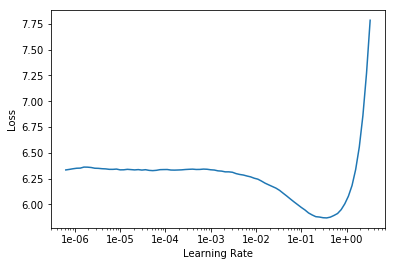

In [42]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.save('bs32-awdlstm-stage1')

In [ ]:
learn.load('bs32-awdlstm-stage1')

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(skip_end=5)

In [ ]:
learn.save('bs32-awdlstm-stage2')

In [ ]:
learn.load('bs32-awdlstm-stage2')

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(skip_end=5)

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-4, moms=(0.8,0.7))

In [ ]:
learn.save('bs60-awdlstm-stage2-2')

In [ ]:
learn.save_encoder('bs60-awdlstm-enc-stage2')

In [ ]:
TEXT = "This school is"
N_WORDS = 40

for temp in [0.1,0.5,1,1.5,2,2.5]: # prediction: from conservative to 'why not' 
    print(learn.predict(TEXT, N_WORDS, temperature=temp))
    print('-'*10)

## Use custom items with the Data Block API

In [ ]:
cat_cols = ['date','school']
cont_cols = []
txt_cols = ['text']
dep_var = ['label']
procs = [FillMissing, Categorify, Normalize]

In [ ]:
partial_train = train.sample(int(len(train)/100)) 
print(len(partial_train))
partial_test = test.sample(int(len(test)/100))
print(len(partial_test))

In [ ]:
itemList = (TabularTextList.from_df(train, cat_cols, 
            cont_cols, txt_cols, vocab=data_lm.vocab, 
            procs=procs, path='./')
            .split_by_rand_pct(valid_pct=0.2)
            .label_from_df(cols=dep_var)
            .add_test(TabularTextList.from_df(test, cat_cols, 
                    cont_cols, txt_cols, path='./')))

In [ ]:
print(f'CATS:\n{itemList.cat_names}')
print(f'CONTS:\n{itemList.cont_names}')
print(f'TEXT COLS:\n{itemList.text_cols}')
print(f'PROCS:\n{itemList.procs}')
print('')

In [ ]:
# Make databunch
collate_fn = partial(mixed_tabular_pad_collate, pad_idx=1, pad_first=True)
data = itemList.databunch(bs=32, collate_fn=collate_fn, no_check=False)

In [ ]:
data.show_batch()

In [ ]:
data.sanity_check()

In [ ]:
data.one_batch()

## Define custom learner and classifier

In [ ]:
class PoolingLinearTabularTextClassifier(nn.Module):
    "Create a linear classifier with pooling."

    def __init__(self, rnn_lin_layers:Collection[int], ps_lin_ftrs:Collection[float],
                 # tabular params inputs
                 emb_szs,n_cont,n_class,layers,ps,emb_drop,y_range,use_bn,bn_final):
        # rnn_lin_layers: e.g [1200, 50, 1]
        # ps_lin_ftrs: e.g [0.4 (from output_p layer1200), 0.1 for layer50]
        
        super().__init__()
        # text layers. Source: fastai.text.learner.PoolingLinearClassifier
        mod_layers = []
        activs = [nn.ReLU(inplace=True)] * (len(rnn_lin_layers) - 2) + [None]
        for n_in,n_out,p,actn in zip(rnn_lin_layers[:-1],rnn_lin_layers[1:], ps_lin_ftrs, activs):
            mod_layers += bn_drop_lin(n_in, n_out, p=p, actn=actn)
        mod_layers = mod_layers[:-1] # exclude the last linear output
        self.rnn_lin_layers = nn.Sequential(*mod_layers) 
        
    
        #tabular layers. Source: fastai.tabular.models.TabularModel
        ps = ifnone(ps, [0]*len(layers))
        ps = listify(ps, layers)
                
        # embedding stuff
        self.embeds = nn.ModuleList([embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(emb_drop) # drop for embedding
        self.bn_cont = nn.BatchNorm1d(n_cont) # bn for continuous features
        n_emb = sum(e.embedding_dim for e in self.embeds) # total length of cat embeddings
        
               
        self.n_emb,self.n_cont,self.y_range = n_emb,n_cont,y_range
        sizes = self.get_sizes(layers, rnn_lin_layers[-2],n_class) # e.g [343, 222, 111, 1] ->convert to [343+ 50, 222, 111, 1]        
        actns = [nn.ReLU(inplace=True)] * (len(sizes)-2) + [None] # [ReLU(inplace), ReLU(inplace), None]
        
        layers = []
        for i,(n_in,n_out,dp,act) in enumerate(zip(sizes[:-1],sizes[1:],[0.]+ps,actns)):
            layers += bn_drop_lin(n_in, n_out, bn=use_bn and i!=0, p=dp, actn=act)
        if bn_final: layers.append(nn.BatchNorm1d(sizes[-1]))
        
        self.layers = nn.Sequential(*layers)
        
    def get_sizes(self, layers, rnn_lin_layer, out_sz):
        # concatenate cat,conts of tabular and rnn lin layer 
        return [self.n_emb + self.n_cont + rnn_lin_layer] + layers + [out_sz]
    
    
    def forward(self, input:Tuple[Tensor,Tensor,Tensor,Tensor,Tensor]):
        x_cat,x_cont,raw_outputs,outputs,mask = input
#     def forward(self, x_cat,x_cont,raw_outputs,outputs,mask):

        # text
        output = outputs[-1]
        avg_pool = output.masked_fill(mask[:,:,None], 0).mean(dim=1)
        avg_pool *= output.size(1) / (output.size(1)-mask.float().sum(dim=1))[:,None]
        max_pool = output.masked_fill(mask[:,:,None], -float('inf')).max(dim=1)[0]
        x_text = torch.cat([output[:,-1], max_pool, avg_pool], 1) #(bs,1200) for AWD LSTM
        x_text = self.rnn_lin_layers(x_text) # (bs,50)
        
        # tabular
        if self.n_emb != 0:
            x = [e(x_cat[:,i]) for i,e in enumerate(self.embeds)]
            x = torch.cat(x, 1)
            x = self.emb_drop(x)
        if self.n_cont != 0:
            x_cont = self.bn_cont(x_cont)
            x = torch.cat([x, x_cont], 1) if self.n_emb != 0 else x_cont
            
        x = torch.cat([x_text,x],1)
        x = self.layers(x)
        if self.y_range is not None:
            x = (self.y_range[1]-self.y_range[0]) * torch.sigmoid(x) + self.y_range[0]
        return x,raw_outputs,outputs # TODO: why do we need raw_outputs and outputs?

class MultiBatchMixEncoder(MultiBatchEncoder):
    "Create an encoder over `module` that can process a full sentence."
    def __init__(self, bptt:int, max_len:int, module:nn.Module, pad_idx:int=1):
        super().__init__(bptt,max_len,module,pad_idx)


#     def forward(self,x_cat:Tensor,x_cont:Tensor,x_text:Tensor):
    def forward(self, input:Tuple[Tensor,Tensor,Tensor]):
        # Source: fastai.text.learner.MultiBatchEncoder.forward func
        x_cat,x_cont,x_text = input
        bs,sl = x_text.size()
        self.reset()
        raw_outputs,outputs,masks = [],[],[]
        for i in range(0, sl, self.bptt):
            r, o = self.module(x_text[:,i: min(i+self.bptt, sl)]) # call AWS LSTM model
            if i>(sl-self.max_len):
                masks.append(x_text[:,i: min(i+self.bptt, sl)] == self.pad_idx)
                raw_outputs.append(r)
                outputs.append(o)
        return x_cat,x_cont,self.concat(raw_outputs),self.concat(outputs),torch.cat(masks,dim=1)

class SequentialMultipleInput(SequentialRNN):
    "A workaround for multiple inputs in nn.Sequential"
    def forward(self,*input):
        for module in self._modules.values():
            input = module(input)
        return input

In [ ]:
def get_tabular_text_classifier(emb_szs:ListSizes, n_cont:int , n_class:int, layers:Collection[int], 
                                # text classifier params inputs
                                arch:Callable, vocab_sz:int, bptt:int=70, max_len:int=20*70, config:dict=None, 
                                drop_mult:float=1., lin_ftrs:Collection[int]=None, ps_lin_ftrs:Collection[float]=None,pad_idx:int=1,
                                # tabular params inputs
                                ps:Collection[float]=None,emb_drop:float=0., y_range:OptRange=None, use_bn:bool=True, bn_final:bool=False
                               ) -> nn.Module:
    "Create a text classifier from `arch` and its `config`, maybe `pretrained`."
    
    meta = text.learner._model_meta[arch]
    config = ifnone(config, meta['config_clas'].copy())
    for k in config.keys(): 
        if k.endswith('_p'): config[k] *= drop_mult # drop_mult: multiply to different dropouts in AWD LSTM
    if lin_ftrs is None: lin_ftrs = []
    if ps_lin_ftrs is None:  ps_lin_ftrs = []
    
    rnn_lin_layers = [config[meta['hid_name']] * 3] + lin_ftrs + [n_class] # [1200, 50, 1]
    ps_lin_ftrs = [config.pop('output_p')] + ps_lin_ftrs #[0.4 (from output_p) for layer1200, 0.1 for layer50]
    init = config.pop('init') if 'init' in config else None
    encoder = MultiBatchMixEncoder(bptt, max_len, arch(vocab_sz, **config), pad_idx=pad_idx)
    
    tabtext_lin_model = PoolingLinearTabularTextClassifier(rnn_lin_layers, ps_lin_ftrs,
                                                       # tabular params inputs
                                                      emb_szs,n_cont,n_class,layers,ps,emb_drop,y_range,use_bn,bn_final)

    # Problem: SequentialRNN is nn.Sequential, and nn.Sequential has its own forward which is accepting only one argument
    # Workaround
    final_model = SequentialMultipleInput(encoder, tabtext_lin_model)
    return final_model if init is None else final_model.apply(init)

In [ ]:
def tabtext_learner(data,
                    arch:Callable,
                    metrics=None,
                    layers:Collection[int]=[400,200],                    
                    # text classifier params inputs                   
                    bptt:int=70, max_len:int=20*70, config:dict=None,                     
                    drop_mult:float=1., lin_ftrs:Collection[int]=None, ps_lin_ftrs:Collection[float]=None,pad_idx:int=1,
                    # tabular params inputs
                    emb_szs:Dict[str,int]=None, ps:Collection[float]=None,emb_drop:float=0., 
                    y_range:OptRange=None, use_bn:bool=True, bn_final:bool=False,pretrained:bool=True, **learn_kwargs):
    #tabular
    emb_szs = data.get_emb_szs(ifnone(emb_szs, {}))
    model = get_tabular_text_classifier(emb_szs,len(data.cont_names),data.c,layers,
                                       arch,len(data.vocab.itos),bptt=bptt,max_len=max_len,config=config,
                                        drop_mult=drop_mult, lin_ftrs=lin_ftrs,ps_lin_ftrs=ps_lin_ftrs,
                                        pad_idx=pad_idx,ps=ps,emb_drop=emb_drop,y_range=y_range,
                                       use_bn=use_bn,bn_final=bn_final)
    #text
    meta = text.learner._model_meta[arch]
    learn = RNNLearner(data, model, metrics = metrics, split_func=meta['split_clas'], **learn_kwargs)
    if pretrained:
        if 'url' not in meta: 
            warn("There are no pretrained weights for that architecture yet!")
            return learn
        model_path = untar_data(meta['url'], data=False)
        fnames = [list(model_path.glob(f'*.{ext}'))[0] for ext in ['pth', 'pkl']]
        learn.load_pretrained(*fnames, strict=False)
        learn.freeze()
    return learn

In [ ]:
from fastai.callbacks import *
encoder_name = 'bs60-awdlstm-enc-stage2'
def get_tabtext_lr_find(data,params,seed=42):
    reset_seed(seed)
    learn_lf = tabtext_learner(data,AWD_LSTM,metrics=[root_mean_squared_error],**params).to_fp16()
    learn_lf.load_encoder(encoder_name)
    return learn_lf.to_fp32()

def get_tabulartext_learner(data,params):
    learn= tabtext_learner(data,AWD_LSTM,metrics=[root_mean_squared_error],
                               callback_fns=[partial(SaveModelCallback, monitor='root_mean_squared_error',mode='min',every='improvement',name='best_nn')],
                               **params)
    learn.load_encoder(encoder_name)
    return learn

In [ ]:
params={
    'layers': [400,400,200], # neural network at model's head
    'ps': [0.001,0.,0.], # dropout for NN at model's head
    'bptt': 70,
    'max_len': 20*70,
    'drop_mult': 1., # multiply to different dropouts in AWD LSTM
    'lin_ftrs': [300], # dropout for this linear layer at AWD_LSTM output
    'ps_lin_ftrs': [0.],
    'emb_drop': 0., # embeddings dropout
    'y_range': [0,6], # restrict y range for regression problem
    'use_bn': True
}

In [ ]:
def reset_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
#     tf.set_random_seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
reset_seed()

In [ ]:
learn = get_tabulartext_learner(data,params)

In [ ]:
learn.model

In [ ]:
learn.fit_one_cycle(1,max_lr=1e-02,pct_start=0.3,moms=(0.8,0.7))